In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, norm, kstest, cauchy, laplace, gamma, lognorm, beta
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from datetime import date
import csv

In [2]:
dataset = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Monolithic_metro.csv')
print(dataset.head)

<bound method NDFrame.head of            price        date      time    geo_lat    geo_lon  region  \
0       10200000  2018-04-07  15:23:20  55.655307  37.614605       3   
1        5500000  2018-07-22  23:00:02  55.495187  37.554362       3   
2        6332000  2018-08-13  10:04:00  55.563338  37.851372      81   
3       15800000  2018-09-01  12:50:02  55.680793  37.484593       3   
4        9590400  2018-09-08  00:30:49  55.673715  37.745559       3   
...          ...         ...       ...        ...        ...     ...   
136022   7293900  2021-05-01  20:10:40  55.927587  37.728987      81   
136023  14648480  2021-05-01  20:11:09  55.861148  37.540870       3   
136024  15720696  2021-05-01  20:12:39  55.886918  37.534136       3   
136025  12503160  2021-05-01  20:14:01  55.841415  37.489624       3   
136026  13316200  2021-05-01  20:14:15  55.860240  37.540356       3   

        building_type  level  levels  rooms   area  kitchen_area  object_type  \
0                   2   

In [3]:
price_complet = np.array(dataset[['price']])
price_complet = price_complet.ravel()
print(np.size(dataset)/14)
area_complet = np.array(dataset[['area']])
area_complet = area_complet.ravel()
price_square_meter_complet = price_complet/area_complet
print(np.size(price_square_meter_complet))
dataset['price_square_meter'] = price_square_meter_complet

136027.0
136027


In [143]:
df1 = dataset.iloc [:136027//2+1]
df2 = dataset.iloc [136027//2+1:]
print((np.size(df1)/15,  np.size(df2)/15))

(68014.0, 68013.0)


In [217]:
price_square_meter = np.array(df1[['price_square_meter']])
price_square_meter = price_square_meter.ravel()
price_square_meter_random = np.random.uniform(-0.49, 0.49, np.size(price_square_meter))
price_square_meter = price_square_meter + price_square_meter_random
# print(np.size(price_square_meter))

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.70it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.535639e-11,3642.960743,-2.450315e+06,inf,0.128397,0.0
norm,2.630002e-11,37049.019473,-2.413721e+06,inf,0.116666,0.0
gamma,5.394238e-11,13242.784435,-2.364852e+06,inf,0.228518,0.0
expon,9.032554e-11,4372.260879,-2.329802e+06,inf,0.304865,0.0
uniform,1.504425e-10,2986.707514,-2.295104e+06,inf,0.862731,0.0


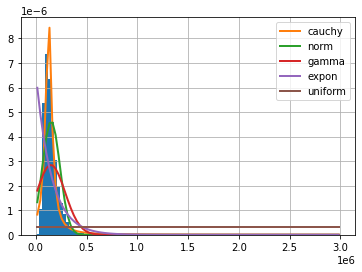

In [218]:
f = Fitter(price_square_meter,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [219]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 127615.22638196446, 'scale': 36219.21213304912}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.79it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,3.987790e-12,9073.519198,-2.541996e+06,inf,0.049060,1.051922e-142
laplace,1.785491e-11,7324.288492,-2.440062e+06,inf,0.100243,0.000000e+00
lognorm,1.525116e-10,3587.909929,-2.294164e+06,inf,0.801018,0.000000e+00
pareto,1.558652e-10,3445.199729,-2.292684e+06,inf,0.567587,0.000000e+00
weibull,inf,inf,inf,inf,NaN,NaN


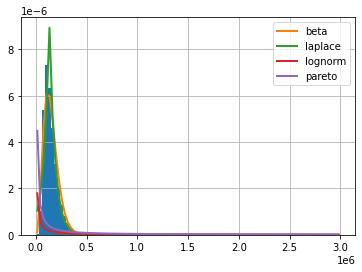

In [220]:
f = Fitter(price_square_meter,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [221]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 4.525060816833751,
  'b': 10435307535418.95,
  'loc': -249.32583011182984,
  'scale': 3.496534643346011e+17}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.55it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,3.987790e-12,9073.519198,-2.541996e+06,inf,0.049060,1.051922e-142
cauchy,1.535639e-11,3642.960743,-2.450315e+06,inf,0.128397,0.000000e+00


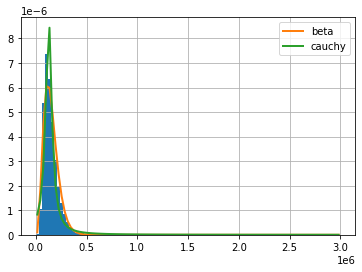

In [222]:
f = Fitter(price_square_meter,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

In [223]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 4.525060816833751,
  'b': 10435307535418.95,
  'loc': -249.32583011182984,
  'scale': 3.496534643346011e+17}}

In [224]:
sample_beta_price_square_meter = beta.rvs(a = 4.525073942381758, b = 6430637556555.085, loc=-249.28179294031176, scale=.1546914136891744e+17, size = np.size(df2))
price_square_meter_2 = np.array(df2[['price_square_meter']])
price_square_meter_2 = price_square_meter_2.ravel()
# price_square_meter_2_random = np.random.uniform(-0.49, 0.49, np.size(price_square_meter_2))
# price_square_meter_2 = price_square_meter_2 + price_square_meter_2_random
kstest(price_square_meter_2, sample_beta_price_square_meter)

KstestResult(statistic=0.9988021897774445, pvalue=0.0)

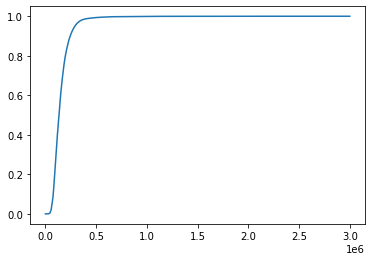

In [226]:
x = np.sort(price_square_meter)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

In [172]:
price = np.array(df1[['price']])
price = price.ravel()
price_random = np.random.uniform(-0.49, 0.49, np.size(price))
price = price + price_random

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.22it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.457003e-15,4.753961e+03,-3.080323e+06,inf,0.144719,0.0
norm,5.140441e-15,5.909686e+04,-2.994573e+06,inf,0.186842,0.0
expon,7.585092e-15,6.786602e+03,-2.968113e+06,inf,0.261691,0.0
uniform,1.571530e-14,3.960329e+03,-2.918568e+06,inf,0.894177,0.0
gamma,1.637278e-14,inf,-2.915769e+06,NaN,1.000000,0.0


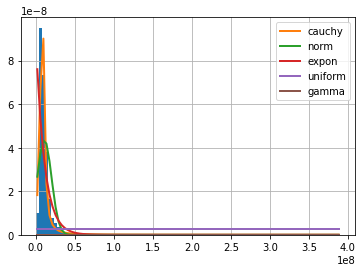

In [173]:
f = Fitter(price,
           distributions=["uniform", "expon", "norm", "gamma", "cauchy"])
f.fit()
f.summary()

In [174]:
f.get_best(method = 'sumsquare_error')

{'cauchy': {'loc': 8231599.295250745, 'scale': 2660912.6541687776}}

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.01it/s]
weibull was not fitted. no parameters available


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.041660e-15,1.211828e+04,-3.103123e+06,inf,0.085833,0.0
laplace,1.872833e-15,1.098026e+04,-3.063246e+06,inf,0.147529,0.0
pareto,1.399755e-14,4.439252e+03,-2.926430e+06,inf,0.564961,0.0
lognorm,1.526291e-14,4.609616e+03,-2.920543e+06,inf,0.805264,0.0
weibull,inf,inf,inf,inf,NaN,NaN


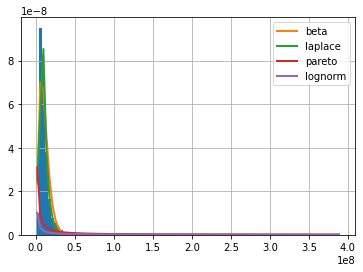

In [175]:
f = Fitter(price,
           distributions=["pareto", "laplace","lognorm", "weibull", "beta"])
f.fit()
f.summary()

In [176]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.936066700021592,
  'b': 20984315633484.92,
  'loc': 2224.2007837824117,
  'scale': 7.894605620956073e+19}}

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.67it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.041660e-15,12118.275743,-3.103123e+06,inf,0.085833,0.0
cauchy,1.457003e-15,4753.961401,-3.080323e+06,inf,0.144719,0.0


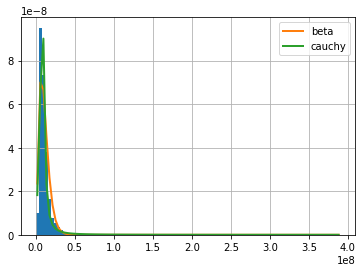

In [177]:
f = Fitter(price,
           distributions=["cauchy", "beta"])
f.fit()
f.summary()

In [178]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.936066700021592,
  'b': 20984315633484.92,
  'loc': 2224.2007837824117,
  'scale': 7.894605620956073e+19}}

In [179]:
sample_beta_price = beta.rvs(a = 2.9520434768528974, b = 20984315633484.92, loc=2224.2007837824117, scale=7.894605620956073e+19, size = np.size(df2))
price_2 = np.array(df2[['price']])
price_2 = price.ravel()
price_random_2 = np.random.uniform(-0.49, 0.49, np.size(price_2))
price_2 = price_2 + price_random_2
kstest(price_2, sample_beta_price)

KstestResult(statistic=0.08946383184594431, pvalue=0.0)

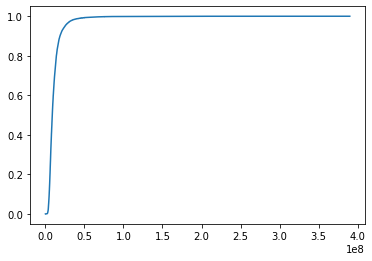

In [114]:
x = np.sort(price)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

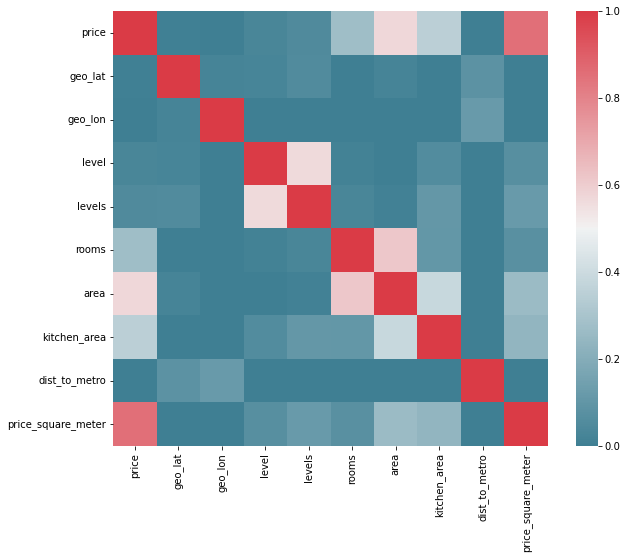

In [235]:
# Выберите нужные параметры для построения матрицы корреляций
selected_columns = ['price', 'geo_lat', 'geo_lon', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'dist_to_metro', 'price_square_meter']

# Создание подмножества данных с выбранными параметрами
data = dataset[selected_columns]

# Отображение статистической информации о данных
# print(data.describe())

# Создание фигуры для отображения матрицы корреляций
f, ax = plt.subplots(figsize=(10, 8))

# Вычисление матрицы корреляций
corr = data.corr()

# Создание тепловой карты с использованием seaborn
sns.heatmap(corr,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=0.0, vmax=1.0,
            square=True, ax=ax)

# Отображение графика
plt.show()

In [236]:
model = LinearRegression()
X = df1[['region', 'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'dist_to_metro']]
y = df1['price_square_meter']

In [237]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [238]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [239]:
first = df2.iloc [:68013]
price_square_meter = np.array(first[['price_square_meter']])
new_data = first[['region', 'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type', 'dist_to_metro']]

In [211]:
predictions = model.predict(new_data)
print(np.size(price_square_meter), np.size(predictions))
# for prediction in predictions:
#     print("Предсказанное значение:", prediction)

68013 68013


In [212]:
mape = mean_absolute_percentage_error(price_square_meter, predictions)
r_squared = model.score(X, y)
print(mape)
print(r_squared)

0.5143853743918828
0.3582996788567765


In [213]:
print(np.size(price_square_meter), np.size(predictions))

68013 68013


68013 68013


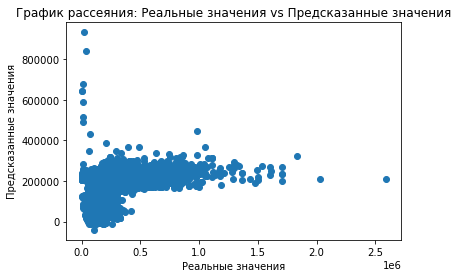

In [214]:
print(np.size(price_square_meter), np.size(predictions))
plt.scatter(price_square_meter, predictions)
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('График рассеяния: Реальные значения vs Предсказанные значения')
plt.show()

In [199]:
coef = model.coef_  # Коэффициенты
intercept = model.intercept_  # Свободный член

print("Коэффициенты:", coef)
print("Свободный член:", intercept)

Коэффициенты: [-1.16317422e+03 -8.75388650e-12  3.01318010e+02 -4.57032304e+01
 -1.12073719e+04  6.69764491e+02  6.77385189e+02 -3.53619433e+03
 -9.59021145e+02]
Свободный член: 189686.59348238952


In [228]:
blocky = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Blocky.csv')
price_blocky = np.array(blocky[['price']])
price_blocky = price_blocky.ravel()
area_blocky = np.array(blocky[['area']])
area_blocky = area_blocky.ravel()
price_square_meter_blocky = price_blocky/area_blocky
blocky['price_square_meter'] = price_square_meter_blocky

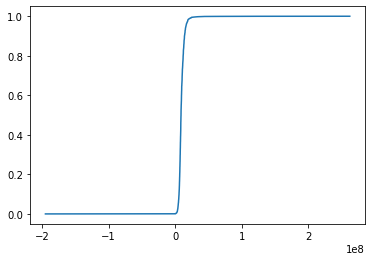

In [229]:
x = np.sort(price_blocky)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

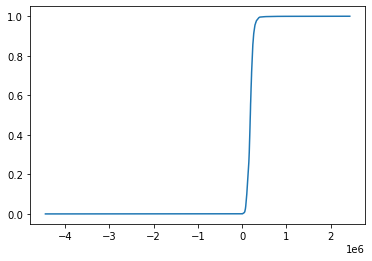

In [230]:
x = np.sort(price_square_meter_blocky)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

In [231]:
brick = pd.read_csv('1moskow_2-3_rooms_upper_floors(6+)_Brick.csv')
price_brick = np.array(brick[['price']])
price_brick = price_brick.ravel()
area_brick = np.array(brick[['area']])
area_brick = area_brick.ravel()
price_square_meter_brick = price_brick/area_brick
brick['price_square_meter'] = price_square_meter_brick

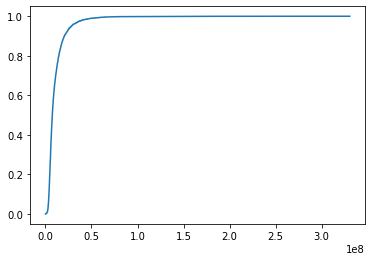

In [232]:
x = np.sort(price_brick)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

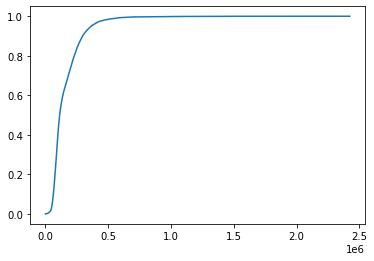

In [233]:
x = np.sort(price_square_meter_brick)
y = np.arange(1, np.size(x)+1) / np.size(x)
fig, ax = plt.subplots()
ax.plot(x, y, label='Empirical Distribution Function')
plt.show()

2018-07-22
2018-08-13
2018-09-01
2018-10-01
2018-11-01
2018-12-01
2019-01-01
2019-02-01
2019-03-01
2019-04-01
2019-05-01
2019-06-01
2019-07-01
2019-08-01
2019-09-01
2019-10-01
2019-11-01
2019-12-01
2020-01-01
2020-02-01
2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01


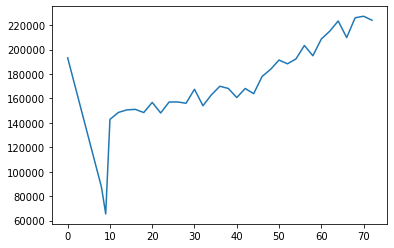

In [7]:
y = []
x = []
idx = 0

with open('1moskow_2-3_rooms_upper_floors(6+)_Monolithic_metro.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    flag1 = True
    flag2 = True
    mdate = None
    summ = 0
    area = 0
    for row in reader:
        if flag1:
            flag1 = False
        elif row != []:
            if flag2:
                flag2 = False
                mdate = date.fromisoformat(row[1])
                summ += float(row[0])
                area += float(row[10])
            elif (mdate.month == date.fromisoformat(row[1]).month) and (mdate.year == date.fromisoformat(row[1]).year):
                summ += float(row[0])
                area += float(row[10])
            else:
                y.append(summ/area)
                x.append(idx)
                summ = 0
                area = 0
                idx += (date.fromisoformat(row[1]) - mdate).days//12
                mdate = date.fromisoformat(row[1])
                summ += float(row[0])
                area += float(row[10])
                print(mdate)

plt.plot(x, y)
plt.show()
